In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

from sklearn.preprocessing import LabelEncoder
from imblearn.combine import SMOTETomek
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, roc_auc_score, confusion_matrix
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, BaggingClassifier, AdaBoostClassifier
from sklearn.metrics import precision_score, recall_score, f1_score
import pickle

In [ ]:
train=pd.read_csv('/content/train.csv')
#test=pd.read_csv('/content/test.csv')
#print(test.columns)
#vehicle_insurance_df=pd.concat([train,test],axis=0)
vehicle_insurance_df=train
print(vehicle_insurance_df)

          id  Gender  Age  Driving_License  Region_Code  Previously_Insured  \
0          1    Male   44                1         28.0                   0   
1          2    Male   76                1          3.0                   0   
2          3    Male   47                1         28.0                   0   
3          4    Male   21                1         11.0                   1   
4          5  Female   29                1         41.0                   1   
...      ...     ...  ...              ...          ...                 ...   
56837  56838    Male   42                1          5.0                   0   
56838  56839    Male   30                1         41.0                   1   
56839  56840  Female   49                1         28.0                   1   
56840  56841  Female   23                1         35.0                   1   
56841  56842    Male   21                1         15.0                   1   

      Vehicle_Age Vehicle_Damage  Annual_Premium  P

In [ ]:
vehicle_insurance_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56842 entries, 0 to 56841
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    56842 non-null  int64  
 1   Gender                56842 non-null  object 
 2   Age                   56842 non-null  int64  
 3   Driving_License       56842 non-null  int64  
 4   Region_Code           56842 non-null  float64
 5   Previously_Insured    56842 non-null  int64  
 6   Vehicle_Age           56842 non-null  object 
 7   Vehicle_Damage        56842 non-null  object 
 8   Annual_Premium        56842 non-null  float64
 9   Policy_Sales_Channel  56842 non-null  float64
 10  Vintage               56842 non-null  int64  
 11  Response              56842 non-null  int64  
dtypes: float64(3), int64(6), object(3)
memory usage: 5.2+ MB


In [ ]:
vehicle_insurance_df.describe()

,id,Age,Driving_License,Region_Code,Previously_Insured,Annual_Premium,Policy_Sales_Channel,Vintage,Response
count,56842.000000,56842.000000,56842.000000,56842.000000,56842.000000,56842.000000,56842.000000,56842.000000,56842.000000
mean,28421.500000,38.766546,0.997783,26.407586,0.458446,30537.745646,112.432884,154.272862,0.122937
std,16409.016338,15.505450,0.047030,13.188777,0.498275,17123.414502,54.018987,83.715704,0.328368
min,1.000000,20.000000,0.000000,0.000000,0.000000,2630.000000,1.000000,10.000000,0.000000
25%,14211.250000,25.000000,1.000000,15.000000,0.000000,24373.000000,30.000000,82.000000,0.000000
50%,28421.500000,36.000000,1.000000,28.000000,0.000000,31706.000000,150.000000,154.000000,0.000000
75%,42631.750000,49.000000,1.000000,35.000000,1.000000,39532.750000,152.000000,227.000000,0.000000
max,56842.000000,85.000000,1.000000,52.000000,1.000000,540165.000000,163.000000,299.000000,1.000000


In [ ]:
vehicle_insurance_df.isnull().sum()

id                      0
Gender                  0
Age                     0
Driving_License         0
Region_Code             0
Previously_Insured      0
Vehicle_Age             0
Vehicle_Damage          0
Annual_Premium          0
Policy_Sales_Channel    0
Vintage                 0
Response                0
dtype: int64

In [ ]:
vehicle_insurance_df['Response'].fillna(0,inplace=True)
vehicle_insurance_df['Vintage'].fillna(0,inplace=True)

In [ ]:
vehicle_insurance_df.drop('id', axis=1, inplace=True)


In [ ]:
print(vehicle_insurance_df)

       Gender  Age  Driving_License  Region_Code  Previously_Insured  \
0        Male   44                1         28.0                   0   
1        Male   76                1          3.0                   0   
2        Male   47                1         28.0                   0   
3        Male   21                1         11.0                   1   
4      Female   29                1         41.0                   1   
...       ...  ...              ...          ...                 ...   
56837    Male   42                1          5.0                   0   
56838    Male   30                1         41.0                   1   
56839  Female   49                1         28.0                   1   
56840  Female   23                1         35.0                   1   
56841    Male   21                1         15.0                   1   

      Vehicle_Age Vehicle_Damage  Annual_Premium  Policy_Sales_Channel  \
0       > 2 Years            Yes         40454.0             

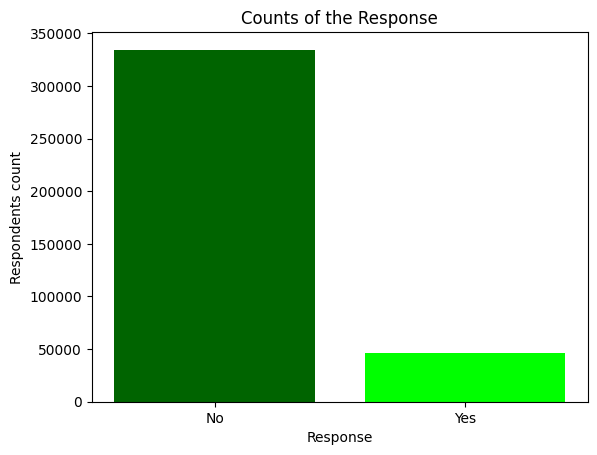

In [ ]:
response_count= vehicle_insurance_df.Response.value_counts()
plt.bar(x=response_count.index.tolist(),height=response_count.values,color=["#006400","#00FF00"])
plt.xticks([0, 1], ["No", "Yes"])
plt.title("Counts of the Response")
plt.xlabel("Response")
plt.ylabel("Respondents count")
plt.show()

From this graph is can be notice that there is imbalance in this dataset. As the count of yes is small as compared to no


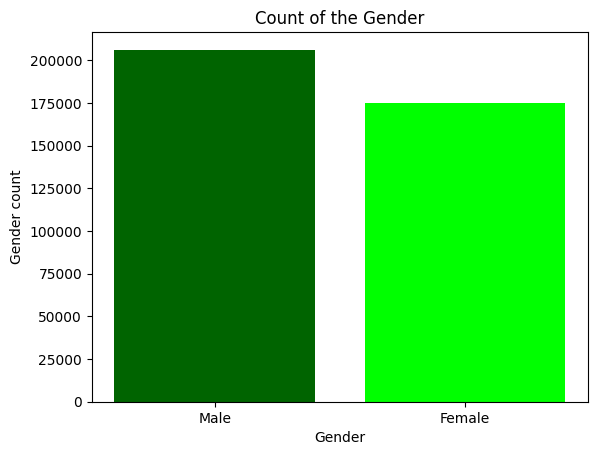

In [ ]:
gender_count= vehicle_insurance_df.Gender.value_counts()
plt.bar(x=gender_count.index.tolist(),height=gender_count.values,color=["#006400","#00FF00"])
#plt.xticks([0, 1], ["No", "Yes"])
plt.title("Count of the Gender")
plt.xlabel("Gender")
plt.ylabel("Gender count")
plt.show()

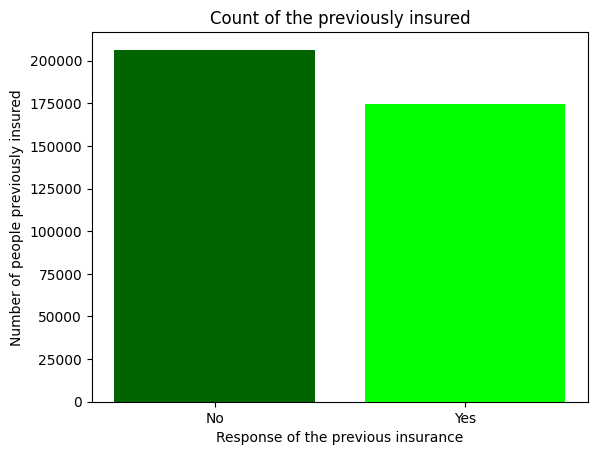

In [ ]:
Previously_Insured_count= vehicle_insurance_df.Previously_Insured.value_counts()
plt.bar(x=Previously_Insured_count.index.tolist(),height=Previously_Insured_count.values,color=["#006400","#00FF00"])
plt.xticks([0, 1], ["No", "Yes"])
plt.title("Count of the previously insured")
plt.xlabel("Response of the previous insurance")
plt.ylabel("Number of people previously insured")
plt.show()

Text(0.5, 1.0, 'Distribution of Respondent Age')

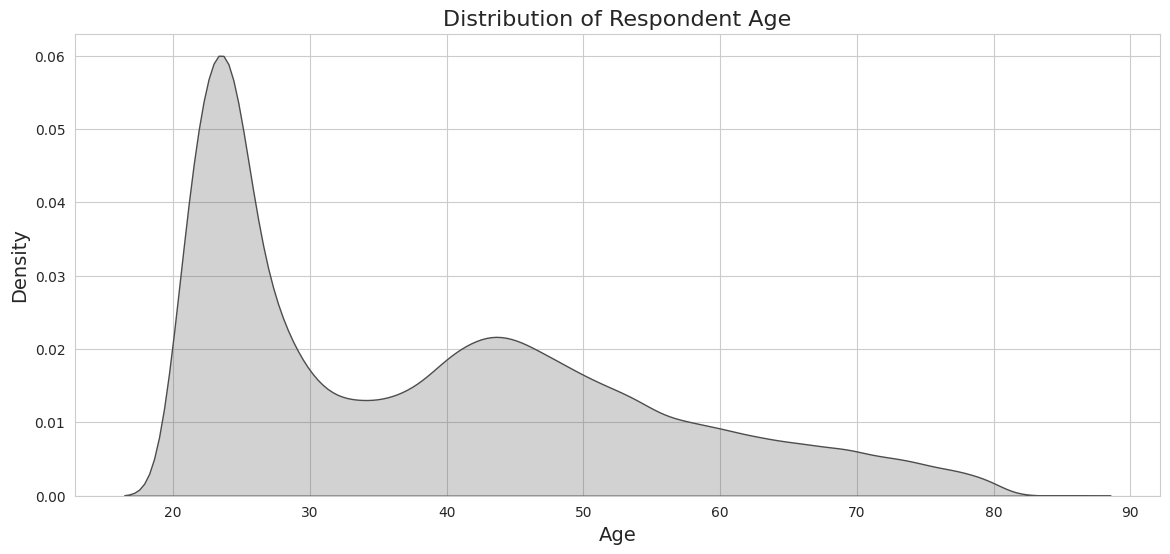

In [ ]:
sns.set_style('whitegrid')
fig, ax1= plt.subplots(ncols=1, figsize=(14,6))
sns.kdeplot(data=vehicle_insurance_df,x='Age',ax=ax1,fill=True, color='#4d4d4d')
ax1.set_xlabel('Age', fontsize=14)
ax1.set_ylabel('Density', fontsize=14)
ax1.set_title('Distribution of Respondent Age', fontsize=16)

From this graph it can be noticed that the age group from 20 to 30 have heavily participated in this survey.

Text(0.5, 1.0, "Distribution of Respondent's Annual premium")

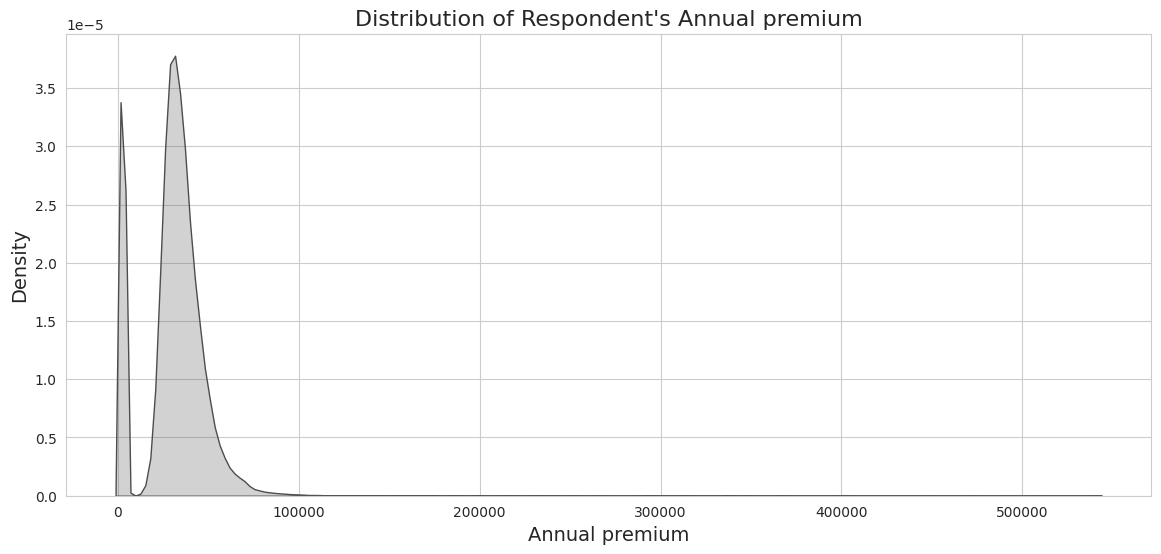

In [ ]:
sns.set_style('whitegrid')
fig, ax1= plt.subplots(ncols=1, figsize=(14,6))
sns.kdeplot(data=vehicle_insurance_df,x='Annual_Premium',ax=ax1,fill=True, color='#4d4d4d')
ax1.set_xlabel('Annual premium', fontsize=14)
ax1.set_ylabel('Density', fontsize=14)
ax1.set_title("Distribution of Respondent's Annual premium", fontsize=16)

From the graph 10000 to 100000 annual premium density is high. Most of people responding pay in annual premium from 10000 to 100000

Text(0.5, 1.0, "Distribution of Respondent's Vintage")

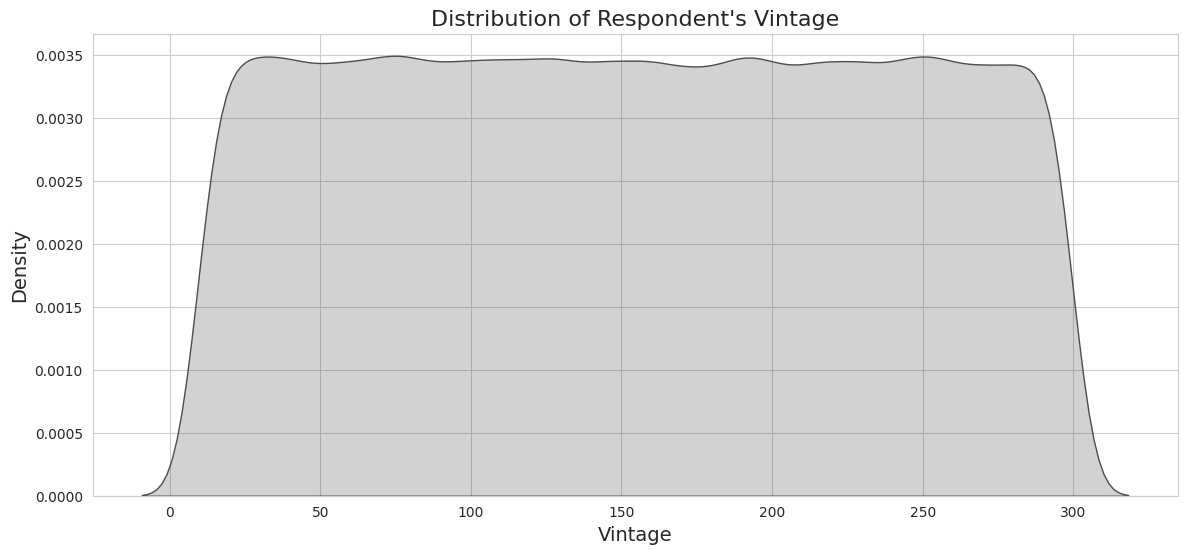

In [ ]:
sns.set_style('whitegrid')
fig, ax1= plt.subplots(ncols=1, figsize=(14,6))
sns.kdeplot(data=vehicle_insurance_df,x='Vintage',ax=ax1,fill=True, color='#4d4d4d')
ax1.set_xlabel('Vintage', fontsize=14)
ax1.set_ylabel('Density', fontsize=14)
ax1.set_title("Distribution of Respondent's Vintage", fontsize=16)

Number of Days, Customer has been associated with the company lies between 0 to 300 days. This means the customers are not associated with insurance company not more than one year.

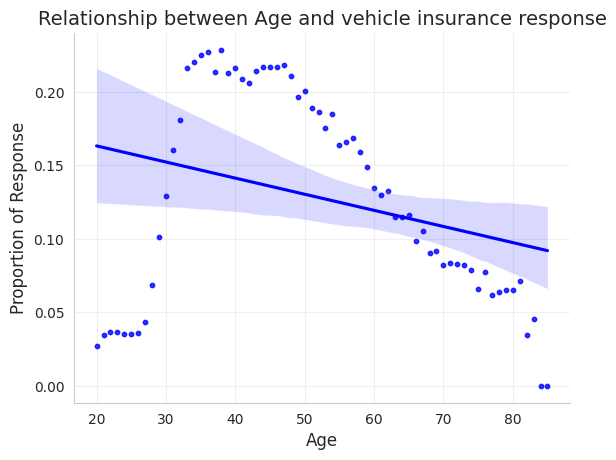

In [ ]:
data_age=vehicle_insurance_df.groupby('Age')['Response'].mean()
sns.regplot(x=data_age.index, y=data_age,color='blue',scatter_kws={'s': 10})

sns.despine()
plt.xlabel('Age', fontsize=12)
plt.ylabel('Proportion of Response', fontsize=12)
plt.title('Relationship between Age and vehicle insurance response', fontsize=14)
plt.grid(axis='both', alpha=0.3)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()




As the age increases the Response for the vehicle insurnce reduces is the trend followed. But the outliers are scattered in form of certain pattern in the graph.

Text(0, 0.5, 'Count')

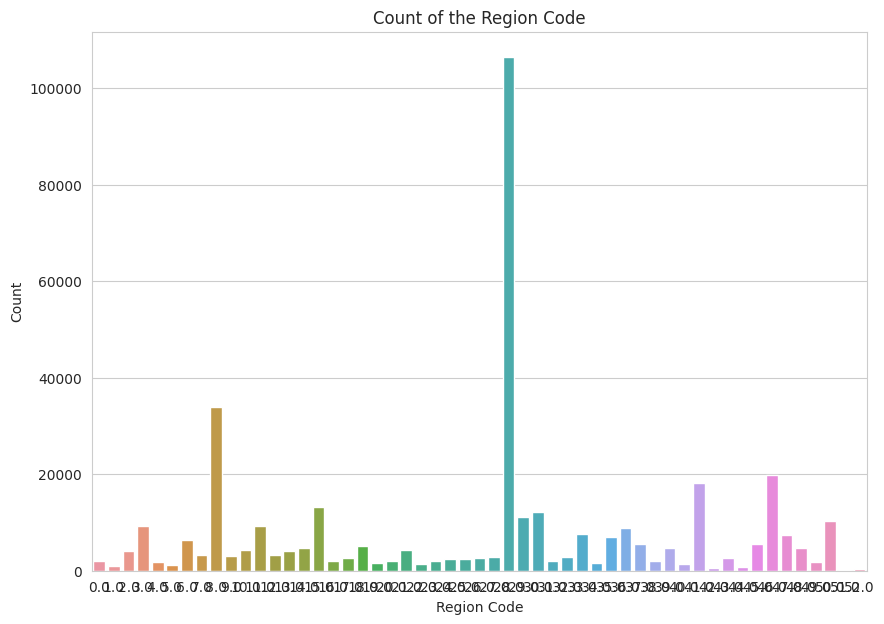

In [ ]:
plt.figure(figsize=(10,7))
sns.countplot(x='Region_Code',data=vehicle_insurance_df)
plt.title("Count of the Region Code")
plt.xlabel("Region Code")
plt.ylabel("Count")

Text(0, 0.5, 'Count')

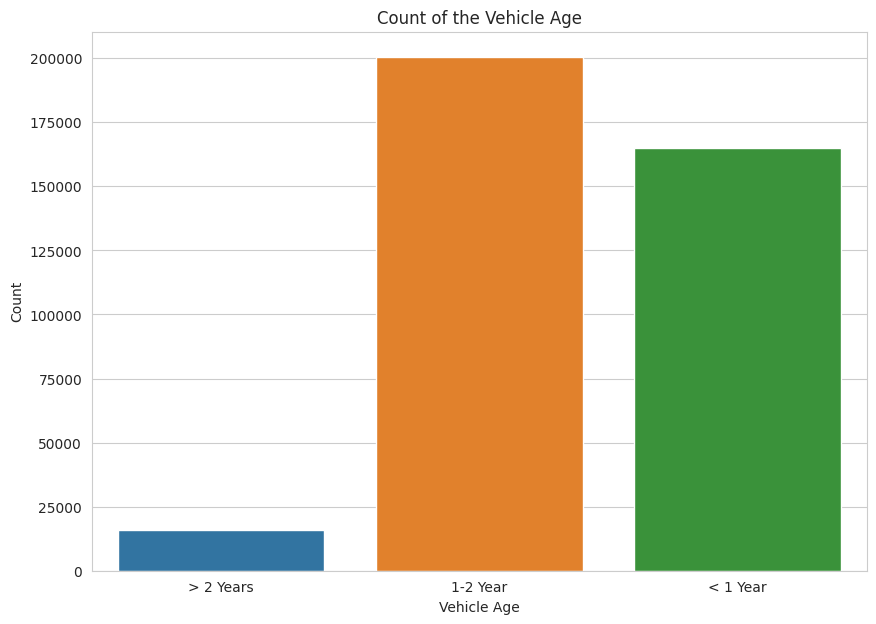

In [ ]:
plt.figure(figsize=(10,7))
sns.countplot(x='Vehicle_Age',data=vehicle_insurance_df)
plt.title("Count of the Vehicle Age")
plt.xlabel("Vehicle Age")
plt.ylabel("Count")

From this graph vehicle age more than 2 years have not participated much. Considering this we can remove this data from the dataset.

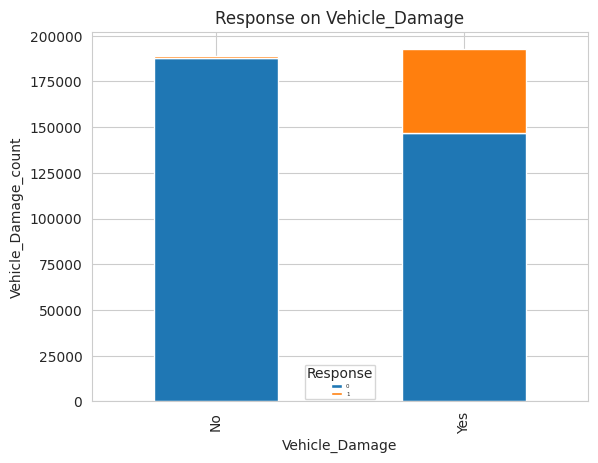

In [ ]:
cross_tab_vehicle_damage = pd.crosstab(vehicle_insurance_df['Vehicle_Damage'],vehicle_insurance_df['Response'])
cross_tab_vehicle_damage.plot(kind='bar', stacked=True)
plt.legend(title='Response', fontsize=4)
# Customize the plot
plt.xlabel('Vehicle_Damage')
plt.ylabel('Vehicle_Damage_count')
plt.title('Response on Vehicle_Damage')
plt.show()


Here it is clearly visible that there is no response for No vehicle damage.


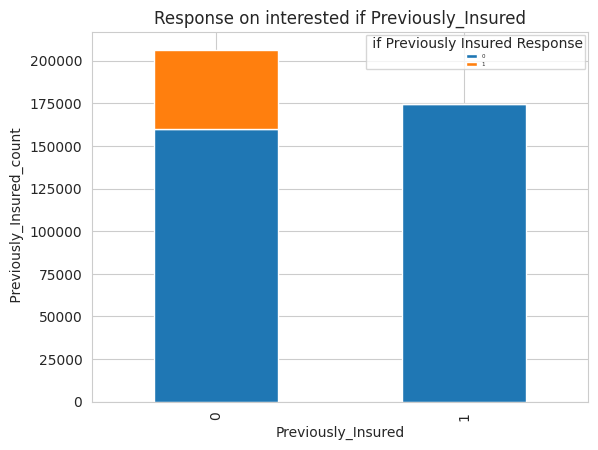

In [ ]:
cross_tab_previous_insurance = pd.crosstab(vehicle_insurance_df['Previously_Insured'],vehicle_insurance_df['Response'])
cross_tab_previous_insurance.plot(kind='bar', stacked=True)
plt.legend(title=' if Previously Insured Response', fontsize=4)
# Customize the plot
plt.xlabel('Previously_Insured')
plt.ylabel(' Previously_Insured_count')
plt.title('Response on interested if Previously_Insured')
plt.show()

Here it is clearly visible that there is no clear interest response for previously insured users.

In [ ]:
dummy_vehicle_age = pd.get_dummies(vehicle_insurance_df['Vehicle_Age'], prefix='Age', prefix_sep='_')
print(dummy_vehicle_age)

       Age_1-2 Year  Age_< 1 Year  Age_> 2 Years
0                 0             0              1
1                 1             0              0
2                 0             0              1
3                 0             1              0
4                 0             1              0
...             ...           ...            ...
56837             1             0              0
56838             0             1              0
56839             1             0              0
56840             0             1              0
56841             0             1              0

[56842 rows x 3 columns]


In [ ]:
vehicle_insurance_df['Gender'] = LabelEncoder().fit_transform(vehicle_insurance_df['Gender'])
vehicle_insurance_df['Vehicle_Damage'] = LabelEncoder().fit_transform(vehicle_insurance_df['Vehicle_Damage'])

In [ ]:
vehicle_insurance_df = pd.concat([vehicle_insurance_df,dummy_vehicle_age], axis=1)


In [ ]:
vehicle_insurance_df.drop('Vehicle_Age', axis=1, inplace=True)
vehicle_insurance_df.drop('Age_1-2 Year', axis=1, inplace=True)

In [ ]:
print(vehicle_insurance_df)

       Gender  Age  Driving_License  Region_Code  Previously_Insured  \
0           1   44                1         28.0                   0   
1           1   76                1          3.0                   0   
2           1   47                1         28.0                   0   
3           1   21                1         11.0                   1   
4           0   29                1         41.0                   1   
...       ...  ...              ...          ...                 ...   
56837       1   42                1          5.0                   0   
56838       1   30                1         41.0                   1   
56839       0   49                1         28.0                   1   
56840       0   23                1         35.0                   1   
56841       1   21                1         15.0                   1   

       Vehicle_Damage  Annual_Premium  Policy_Sales_Channel  Vintage  \
0                   1         40454.0                  26.0    

In [ ]:
X = vehicle_insurance_df.drop('Response', axis=1)
y = vehicle_insurance_df['Response']

In [ ]:
print(X.shape, y.shape)

(56842, 11) (56842,)


In [ ]:
print(y)

0        1
1        0
2        1
3        0
4        0
        ..
56837    0
56838    0
56839    0
56840    0
56841    0
Name: Response, Length: 56842, dtype: int64


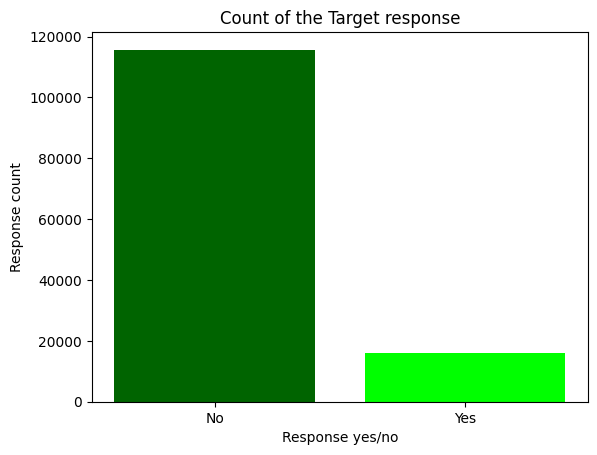

In [ ]:

response_coun_target= y.value_counts()
plt.bar(x=response_coun_target.index.tolist(),height=response_coun_target.values,color=["#006400","#00FF00"])
plt.xticks([0, 1], ["No", "Yes"])
plt.title("Count of the Target response")
plt.xlabel("Response yes/no")
plt.ylabel("Response count")
plt.show()

In [ ]:
X.isnull().sum()

Gender                  0
Age                     0
Driving_License         0
Region_Code             0
Previously_Insured      0
Vehicle_Damage          0
Annual_Premium          0
Policy_Sales_Channel    0
Vintage                 0
Age_< 1 Year            0
Age_> 2 Years           0
dtype: int64

In [ ]:
X['Vintage'].fillna(0,inplace=True)

In [ ]:
smk = SMOTETomek(random_state=42)
X_res,y_res=smk.fit_resample(X,y)

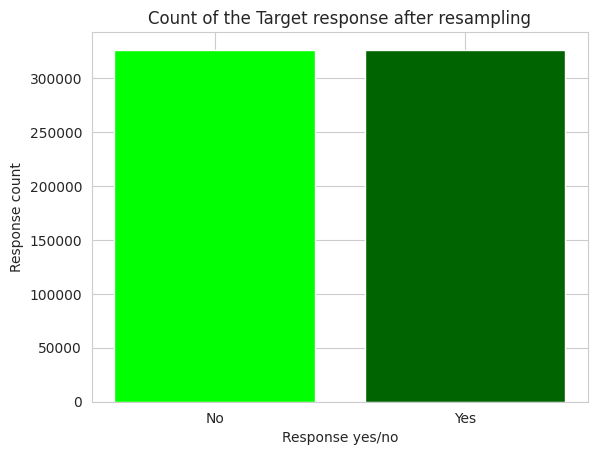

In [ ]:

response_coun_target_res= y_res.value_counts()
plt.bar(x=response_coun_target_res.index.tolist(),height=response_coun_target_res.values,color=["#006400","#00FF00"])
plt.xticks([0, 1], ["No", "Yes"])
plt.title("Count of the Target response after resampling")
plt.xlabel("Response yes/no")
plt.ylabel("Response count")
plt.show()

From the previous graph and this graph it can be noted that the positive response(yes) has significantly increased reducing the imbalance.

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.3)

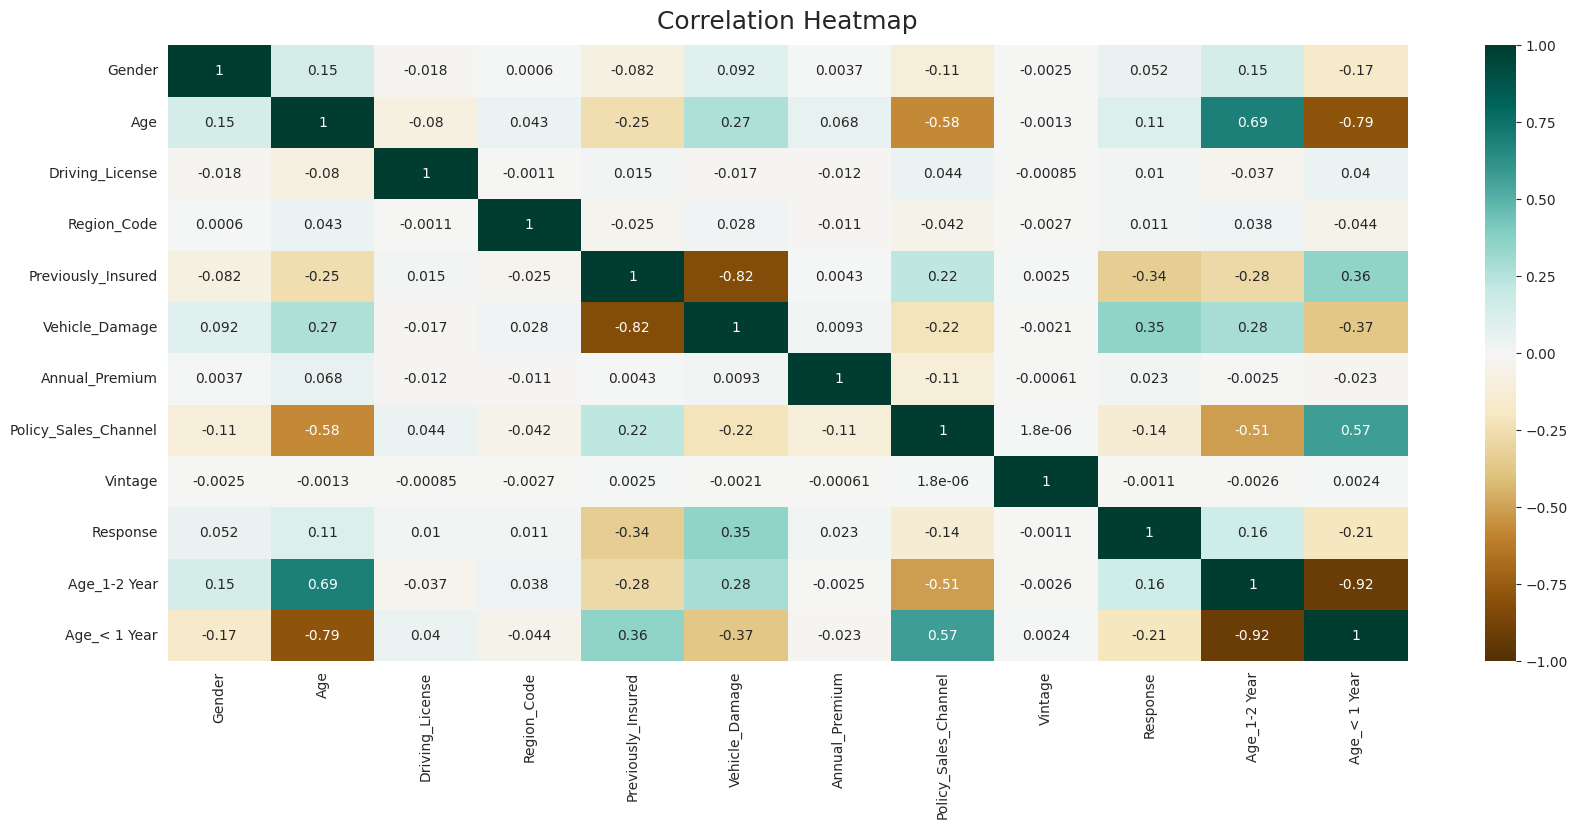

In [ ]:
plt.figure(figsize=(20, 8))
heatmap = sns.heatmap(vehicle_insurance_df.corr(), vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':18}, pad=12);

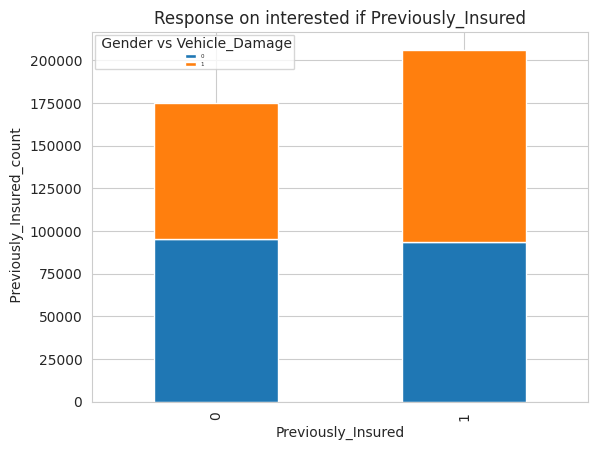

In [ ]:
cross_tab_geneder_vdamage= pd.crosstab(vehicle_insurance_df['Gender'],vehicle_insurance_df['Vehicle_Damage'])
cross_tab_geneder_vdamage.plot(kind='bar', stacked=True)
plt.legend(title=' Gender vs Vehicle_Damage', fontsize=4)
# Customize the plot
plt.xlabel('Previously_Insured')
plt.ylabel(' Previously_Insured_count')
plt.title('Response on interested if Previously_Insured')
plt.show()

In [ ]:
dt_clf = DecisionTreeClassifier()
dt_clf.fit(X_train, y_train)

DecisionTreeClassifier()

In [ ]:
y_preds_dt = dt_clf.predict(X_test)
print("Accuracy Score of the Decision Tree Model", accuracy_score(y_test, y_preds_dt))
print("ROC AUC Score of the Decision Tree Model", roc_auc_score(y_test, y_preds_dt))

Accuracy Score of the Decision Tree Model 0.8791291329651071
ROC AUC Score of the Decision Tree Model 0.8791175488522764


Text(0.5, 1.0, 'Confusion Matrix for Decision Tree Model')

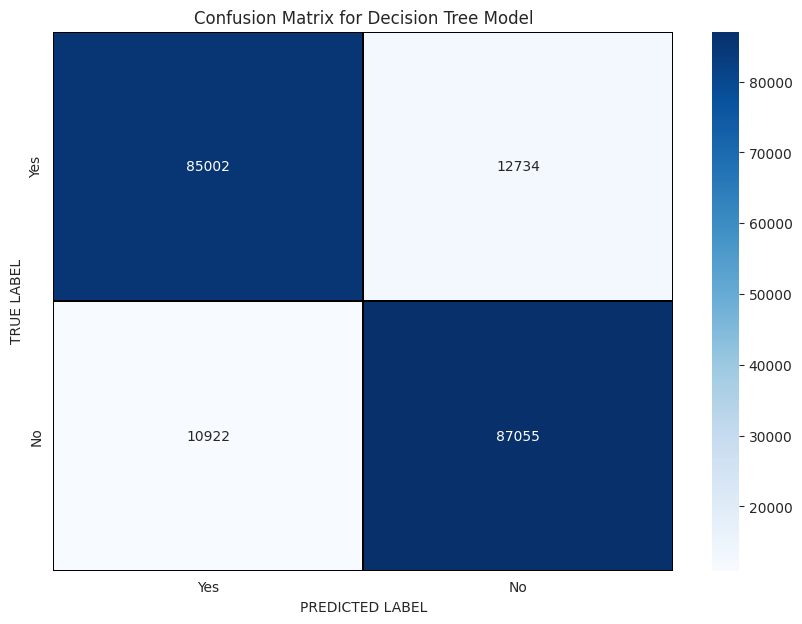

In [ ]:
#Confusion Matrix of Decision Tree Model.
cm = confusion_matrix(y_test, y_preds_dt)

x_axis_labels = ["Yes", "No"]
y_axis_labels = ["Yes", "No"]

f, ax = plt.subplots(figsize =(10,7))
sns.heatmap(cm, annot = True, linewidths=0.2, linecolor="black", fmt = ".0f", ax=ax, cmap="Blues",
            xticklabels=x_axis_labels, yticklabels=y_axis_labels)
plt.xlabel("PREDICTED LABEL")
plt.ylabel("TRUE LABEL")
plt.title('Confusion Matrix for Decision Tree Model')

In [ ]:
rf_clf=RandomForestClassifier(n_estimators=100)
extraTree_clf = ExtraTreesClassifier(n_estimators=100)
bg_clf = BaggingClassifier(n_estimators=100)
ada_clf = AdaBoostClassifier(n_estimators=100)

In [ ]:
bg_clf = BaggingClassifier(n_estimators=100)
bg_clf.fit(X_train, y_train)

BaggingClassifier(n_estimators=100)

In [ ]:
y_preds_bg = bg_clf.predict(X_test)
print("Accuracy Score of the Bagging Classifier Model", accuracy_score(y_test, y_preds_bg))

Accuracy Score of the Bagging Classifier Model 0.894455000863707


In [ ]:
print(y_preds_bg)

[0 0 0 ... 1 1 1]


In [ ]:
rf_clf.fit(X_train, y_train)
extraTree_clf.fit(X_train, y_train)
bg_clf.fit(X_train, y_train)
ada_clf.fit(X_train, y_train)


AdaBoostClassifier(n_estimators=100)

In [ ]:
y_preds_rf = rf_clf.predict(X_test)
y_preds_et = extraTree_clf.predict(X_test)
y_preds_bg = bg_clf.predict(X_test)
y_preds_ada = ada_clf.predict(X_test)

In [ ]:
print("Accuracy Score of the Random Forest Model", accuracy_score(y_test, y_preds_rf))
print("Accuracy Score of the Extre Tree Classifier Model", accuracy_score(y_test, y_preds_et))
print("Accuracy Score of the Bagging Classifier Model", accuracy_score(y_test, y_preds_bg))
print("Accuracy Score of the AdaBoost Classifier Model", accuracy_score(y_test, y_preds_ada))

Accuracy Score of the Random Forest Model 0.8898182542805025
Accuracy Score of the Extre Tree Classifier Model 0.8815306085952389
Accuracy Score of the Bagging Classifier Model 0.9036701700960079
Accuracy Score of the AdaBoost Classifier Model 0.8437712364533781


In [ ]:
print("ROC AUC Score of the Random Forest Model", roc_auc_score(y_test, y_preds_rf))
print("ROC AUC Score of the Extre Tree Classifier Model", roc_auc_score(y_test, y_preds_et))
print("ROC AUC Score of the Bagging Classifier Model", roc_auc_score(y_test, y_preds_bg))
print("ROC AUC Score of the AdaBoost Classifier Model", roc_auc_score(y_test, y_preds_ada))

ROC AUC Score of the Random Forest Model 0.8897918501939234
ROC AUC Score of the Extre Tree Classifier Model 0.8814920360878137
ROC AUC Score of the Bagging Classifier Model 0.9036724086387452
ROC AUC Score of the AdaBoost Classifier Model 0.8436849773863792


precision of extreme tree 0.8740344797204029
recall of extreme tree 0.911234269267277
f_Score of extreme tree 0.8922468069796726


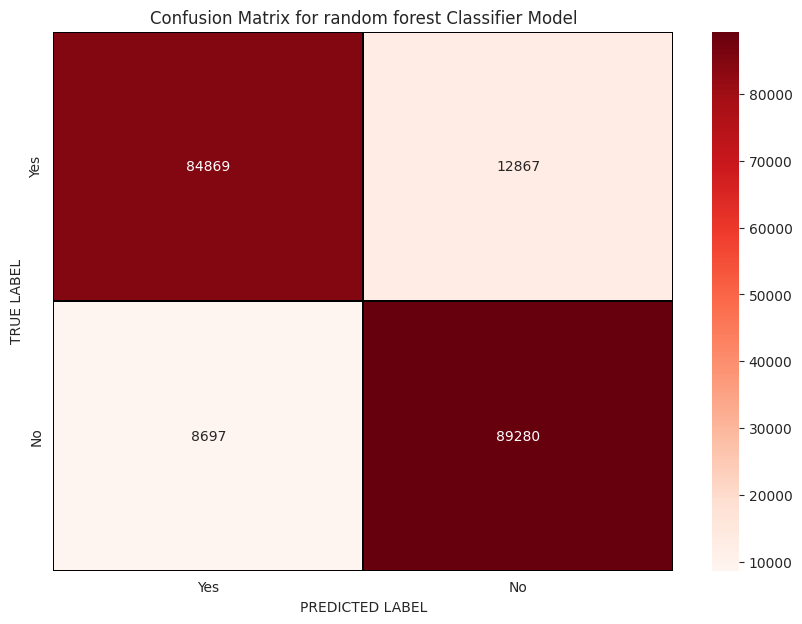

In [ ]:
cm_rf= confusion_matrix(y_test, y_preds_rf)
x_axis_labels = ["Yes", "No"]
y_axis_labels = ["Yes", "No"]

f, ax = plt.subplots(figsize =(10,7))
sns.heatmap(cm_rf,annot = True, linewidths=0.2, linecolor="black", fmt = ".0f", ax=ax, cmap="Reds",
            xticklabels=x_axis_labels, yticklabels=y_axis_labels)
plt.xlabel("PREDICTED LABEL")
plt.ylabel("TRUE LABEL")
plt.title('Confusion Matrix for random forest Classifier Model')

precision_rf = precision_score(y_test, y_preds_rf)
recall_rf = recall_score(y_test, y_preds_rf)
f1_rf = f1_score(y_test, y_preds_rf)
print("precision of extreme tree",precision_rf)
print("recall of extreme tree",recall_rf)
print("f_Score of extreme tree",f1_rf)

precision of extreme tree 0.8592991861951018
recall of extreme tree 0.9128162732069771
f_Score of extreme tree 0.8852496337648968


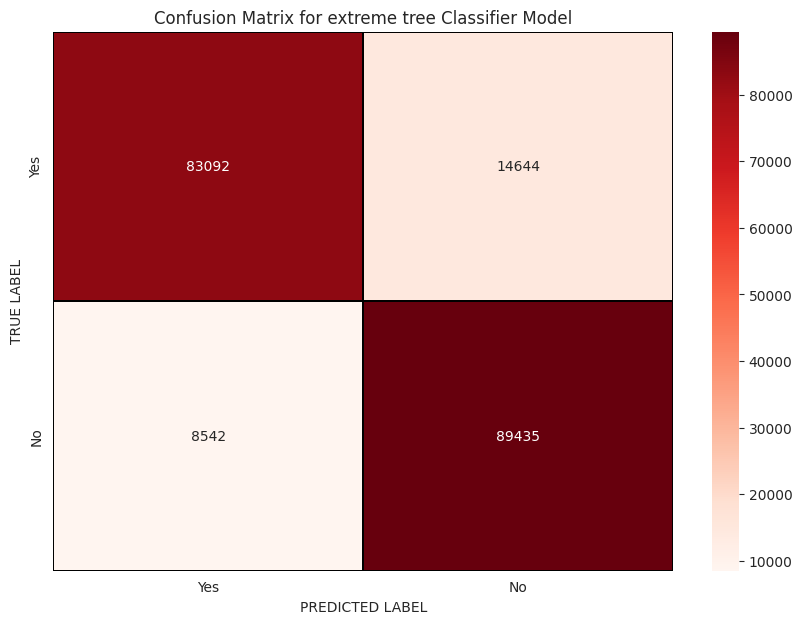

In [ ]:
cm_et= confusion_matrix(y_test, y_preds_et)
x_axis_labels = ["Yes", "No"]
y_axis_labels = ["Yes", "No"]

f, ax = plt.subplots(figsize =(10,7))
sns.heatmap(cm_et,annot = True, linewidths=0.2, linecolor="black", fmt = ".0f", ax=ax, cmap="Reds",
            xticklabels=x_axis_labels, yticklabels=y_axis_labels)
plt.xlabel("PREDICTED LABEL")
plt.ylabel("TRUE LABEL")
plt.title('Confusion Matrix for extreme tree Classifier Model')

precision_et = precision_score(y_test, y_preds_et)
recall_et = recall_score(y_test, y_preds_et)
f1_et = f1_score(y_test, y_preds_et)
print("precision of extreme tree",precision_et)
print("recall of extreme tree",recall_et)
print("f_Score of extreme tree",f1_et )

precision of extreme tree 0.9053566671448185
recall of extreme tree 0.9018545168764097
f_Score of extreme tree 0.9036021986450211


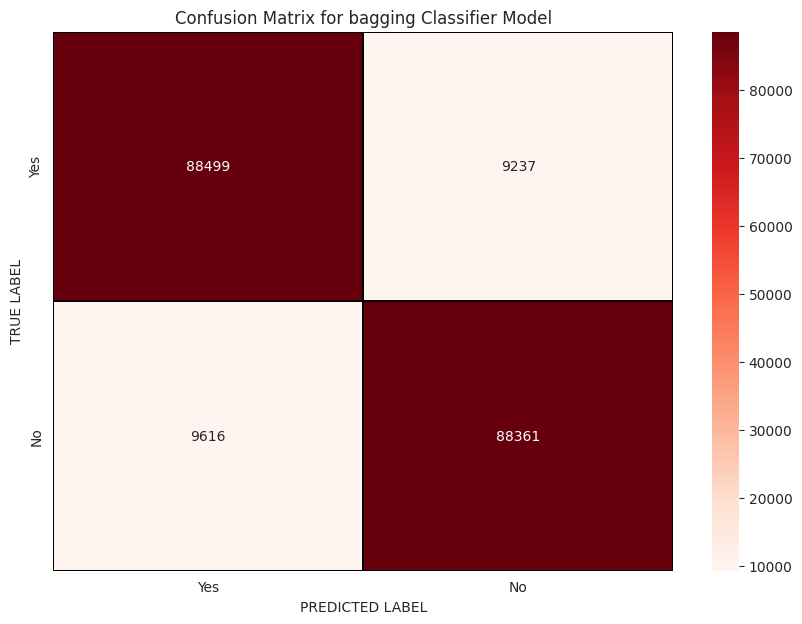

In [ ]:
cm_bg =confusion_matrix(y_test, y_preds_bg)
x_axis_labels = ["Yes", "No"]
y_axis_labels = ["Yes", "No"]

f, ax = plt.subplots(figsize =(10,7))
sns.heatmap(cm_bg,annot = True, linewidths=0.2, linecolor="black", fmt = ".0f", ax=ax, cmap="Reds",
            xticklabels=x_axis_labels, yticklabels=y_axis_labels)
plt.xlabel("PREDICTED LABEL")
plt.ylabel("TRUE LABEL")
plt.title('Confusion Matrix for bagging Classifier Model')

precision_bg = precision_score(y_test,y_preds_bg)
recall_bg = recall_score(y_test, y_preds_bg)
f1_bg = f1_score(y_test, y_preds_bg)
print("precision of extreme tree",precision_bg)
print("recall of extreme tree",recall_bg)
print("f_Score of extreme tree",f1_bg)

precision of adaboost 0.8018432766975073
recall of adaboost 0.9137348561397063
f_Score of adaboost 0.854140230696574


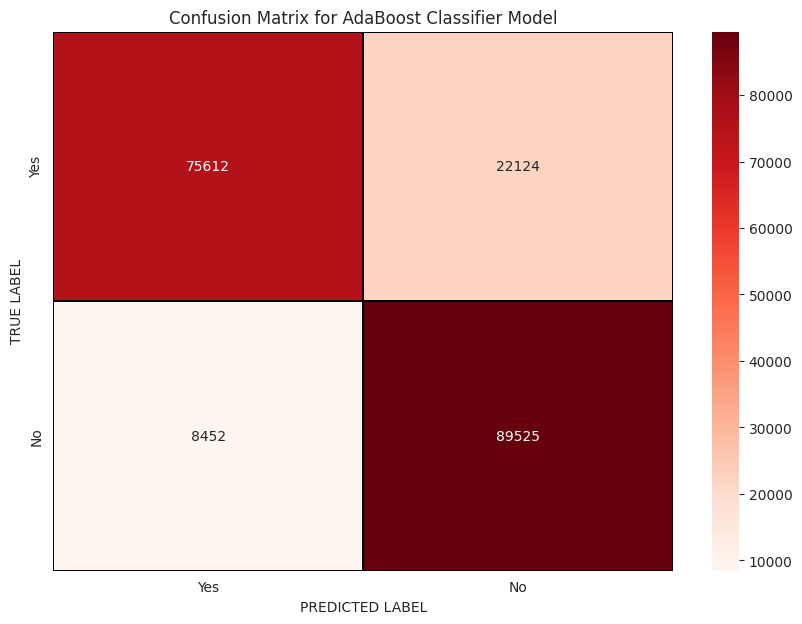

In [ ]:
#Confusion Matrix of AdaBoost Classifier Model.
cm_ad= confusion_matrix(y_test, y_preds_et)
x_axis_labels = ["Yes", "No"]
y_axis_labels = ["Yes", "No"]

f, ax = plt.subplots(figsize =(10,7))
sns.heatmap(cm_ad,annot = True, linewidths=0.2, linecolor="black", fmt = ".0f", ax=ax, cmap="Reds",
            xticklabels=x_axis_labels, yticklabels=y_axis_labels)
plt.xlabel("PREDICTED LABEL")
plt.ylabel("TRUE LABEL")
plt.title('Confusion Matrix for extreme tree Classifier Model')

precision_ad = precision_score(y_test, y_preds_ada)
recall_ad = recall_score(y_test, y_preds_ada)
f1_ad = f1_score(y_test, y_preds_ada)
print("precision of adaboost",precision_ad)
print("recall of adaboost",recall_ad)
print("f_Score of adaboost",f1_ad )

From above analysis of different algorithmswe can say that bagging Classifier is the having highest accuracy along with highes roc, f1_score, precision and recall.

In [ ]:
from joblib import dump
MODEL_NAME = "insurance-response-predictor.pkl"
dump(bg_clf, MODEL_NAME)

In [ ]:
from joblib import dump
#model = ...  # Your model object

dump(bg_clf, 'insurance-response-predictor_1.pkl')

['insurance-response-predictor_1.pkl']

In [ ]:
from joblib import load

model = load('insurance-response-predictor_1.pkl')

In [ ]:
from joblib import dump
dump(bg_clf, 'bg_model.joblib')

['bg_model.joblib']

In [ ]:
#def extract_values(json_obj, values_array):
    #if isinstance(json_obj, dict):
        #for key, value in json_obj.items():
            #extract_values(value, values_array)
    #elif isinstance(json_obj, list):
        #for item in json_obj:
            #extract_values(item, values_array)
    #else:
        #values_array.append(json_obj)
    #return values_array